## Import relevant libraries

In [94]:
import pandas as pd
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [96]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

## Read data

In [97]:
data = pd.read_excel('Data_Skiresorts_Final.xlsx')
df = data.copy()
df.head()

,Skiresort_ID,Bergfex_ID,Ort,PLZ,Unnamed: 4,Höhendifferenz in,Min Höhe in,Max Höhe in m,Pisten_km,blaue_Piste,...,schwarze_Piste,Anzahl_Bahnen,Preis in CHF,Preis in EUR,Kanton_Kuerzel,SPRACHCODE,Geo Shape,Breitengrad,Längengrad,2000er_Schwelle
0,1,154,Unterbach,3857,Brandalp/Ginals Unterbach Unterbach,1213,1230,2443,19.0,10.0,...,3.0,7,52.0,53.0,BE,1,"{""coordinates"":[[[8.089758501236219,46.7278423...",46.737816,8.118977,Über 2000 Meter
1,2,1,Adelboden,3715,Adelboden Adelboden Adelboden,940,1260,2200,86.0,46.0,...,6.0,25,70.0,71.0,BE,1,"{""coordinates"":[[[7.556297221810153,46.4136636...",46.473621,7.555155,Über 2000 Meter
2,3,135,Scuol,7550,Motta Naluns Scuol Scuol,1535,1250,2785,70.0,27.0,...,11.0,10,67.0,68.0,GR,1,"{""coordinates"":[[[10.337667606548692,46.651644...",46.734561,10.326322,Über 2000 Meter
3,4,137,Samnaun,7562,Silvretta Arena Ischgl/Samnaun Samnaun,1512,1360,2872,239.0,47.0,...,49.0,41,67.0,67.0,GR,1,"{""coordinates"":[[[10.391389969430705,46.942032...",46.963293,10.402297,Über 2000 Meter
4,5,26,Verbier,1936,4 Vallees Verbier/La Tzoumaz/Nendaz/Veysonnaz...,2509,821,3330,412.0,107.0,...,103.0,67,82.0,83.0,VS,2,"{""coordinates"":[[[7.279137318615009,46.0968681...",46.100790,7.229655,Über 2000 Meter


## Transform data

Print columns

In [88]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'Ort', 'PLZ', 'Unnamed: 4',
       'Höhendifferenz in', 'Min Höhe in', 'Max Höhe in m', 'Pisten_km',
       'blaue_Piste', 'rote_Piste', 'schwarze_Piste', 'Anzahl_Bahnen',
       'Preis in CHF', 'Preis in EUR', 'Kanton_Kuerzel', 'SPRACHCODE',
       'Geo Shape', 'Breitengrad', 'Längengrad', '2000er_Schwelle'],
      dtype='object')

Rename column

In [98]:
df.rename(columns={'Unnamed: 4':'Skiresort','Kanton_Kuerzel': 'Kanton' }, inplace=True)

Assign values to two new columns

In [99]:
df.loc[(df['Max Höhe in m'] > 1999), 'Über 2000'] = 1
df.loc[(df['Max Höhe in m'] < 2000), 'Über 2000'] = 0
df.loc[(df['Max Höhe in m'] > 1999), 'Unter 2000'] = 0
df.loc[(df['Max Höhe in m'] < 2000), 'Unter 2000'] = 1


## Create Pie chart

Sum values within two columns

In [100]:
df_sum_höhe = df[['Unter 2000', 'Über 2000']].sum()
df_sum_höhe

Unter 2000    255.0
Über 2000     100.0
dtype: float64

Build pie chart 

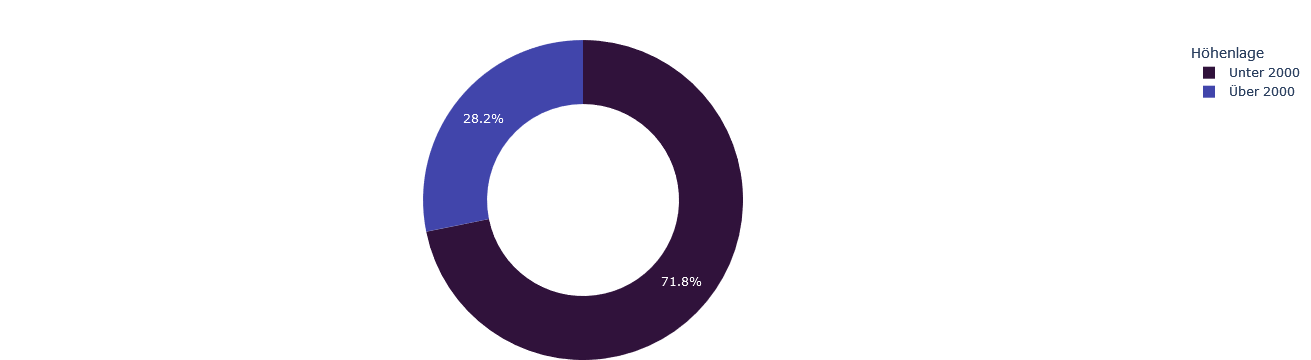

In [177]:
fig_pie = px.pie(df_sum_höhe, 
                 values=df_sum_höhe, 
                 names = df_sum_höhe.index, 
                 hole=.6,  
                 color_discrete_sequence=px.colors.sequential.Turbo
                )

fig_pie.update_layout(height = 300,
                      margin={"r":0,"t":40,"l":0,"b":0},
                      showlegend = True,
                      legend=dict(title="Höhenlage",))
fig_pie.show()

Save it as html file

In [178]:
fig_pie.write_html('Pie_Chart.html')

## Create Bar chart

Create dataframe

In [104]:
df_Kanton_Höhe = df.groupby('Kanton')['Über 2000','Unter 2000'].sum().sort_values(['Über 2000'],ascending=False).reset_index()
df_Kanton_Höhe.head(5)

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Kanton,Über 2000,Unter 2000
0,VS,33.0,12.0
1,GR,33.0,28.0
2,BE,12.0,60.0
3,SG,5.0,20.0
4,VD,4.0,17.0


Create chart


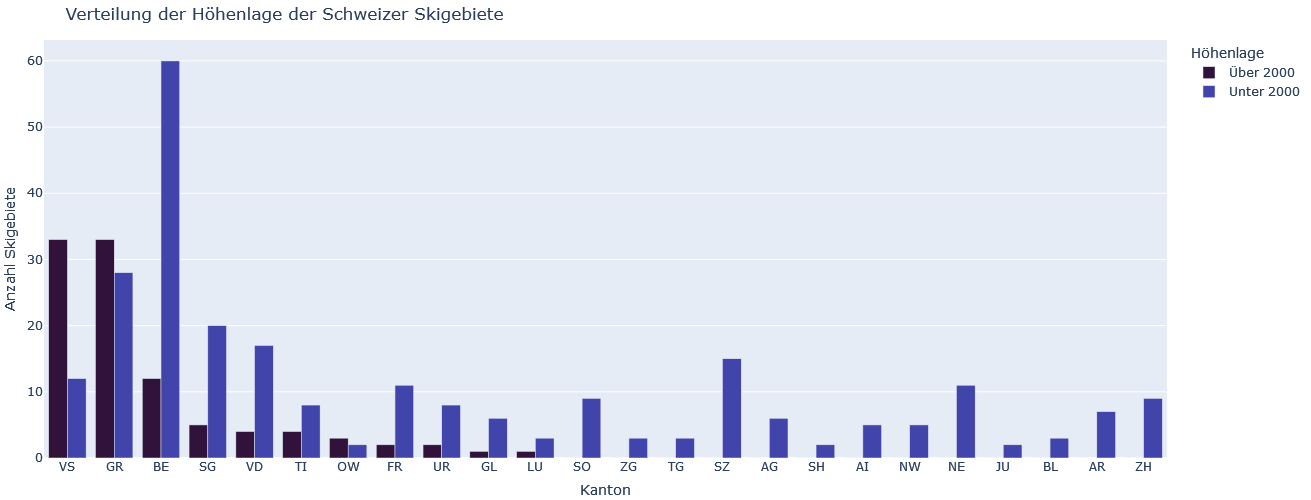

In [105]:
fig_bar = px.bar(df_Kanton_Höhe, 
             x='Kanton', 
             y = ["Über 2000","Unter 2000"],
             title="Verteilung der Höhenlage der Schweizer Skigebiete", 
             height=500,
             barmode='group',
             labels={'Kanton':'Kanton', 'value': 'Anzahl Skigebiete'},
                 color_discrete_sequence=px.colors.sequential.Turbo
)

fig_bar.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                  showlegend = True,
                  legend=dict(title="Höhenlage",))


fig_bar.show()



Save it as html file

In [106]:
fig_bar.write_html('Bar_Plot_Höhe.html')

# Create Maps

## PX.scatter

Map with px.scatter function from plotly

In [167]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'Ort', 'PLZ', 'Skiresort',
       'Höhendifferenz in', 'Min Höhe in', 'Max Höhe in m', 'Pisten_km',
       'blaue_Piste', 'rote_Piste', 'schwarze_Piste', 'Anzahl_Bahnen',
       'Preis in CHF', 'Preis in EUR', 'Kanton', 'SPRACHCODE', 'Geo Shape',
       'Breitengrad', 'Längengrad', '2000er_Schwelle', 'Über 2000',
       'Unter 2000'],
      dtype='object')

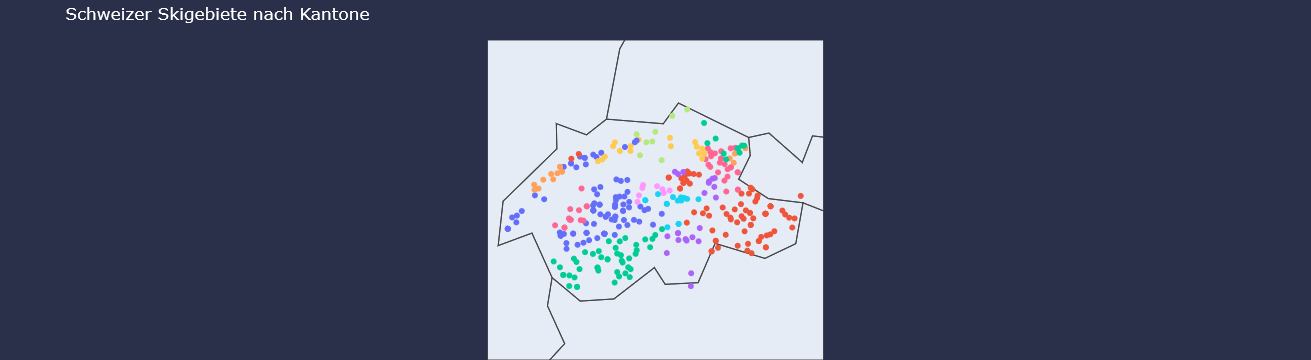

In [168]:
fig_standard_all = px.scatter_geo(df,
                    lat=df.Breitengrad,
                    lon=df.Längengrad,
                    color = df.Kanton,
                    hover_name="Skiresort")

fig_standard_all.update_layout(
    geo_scope='europe',
    margin={"r":0,"t":40,"l":0,"b":0},
    showlegend = False,
    paper_bgcolor="#2a2f4a",
    title="Schweizer Skigebiete nach Kantone",
    title_font_color="white")

fig_standard_all.update_geos(fitbounds="locations")

fig_standard_all.show()


Save it as a html file

In [169]:
fig_standard_all.write_html('Map_Switzerland_Standard.html')

### Filter to skiresorts above 2000 Meter

In [170]:
df_above = df[df['2000er_Schwelle']== 'Über 2000 Meter']
df_above.head(3)

,Skiresort_ID,Bergfex_ID,Ort,PLZ,Skiresort,Höhendifferenz in,Min Höhe in,Max Höhe in m,Pisten_km,blaue_Piste,...,Preis in CHF,Preis in EUR,Kanton,SPRACHCODE,Geo Shape,Breitengrad,Längengrad,2000er_Schwelle,Über 2000,Unter 2000
0,1,154,Unterbach,3857,Brandalp/Ginals Unterbach Unterbach,1213,1230,2443,19.0,10.0,...,52.0,53.0,BE,1,"{""coordinates"":[[[8.089758501236219,46.7278423...",46.737816,8.118977,Über 2000 Meter,1.0,0.0
1,2,1,Adelboden,3715,Adelboden Adelboden Adelboden,940,1260,2200,86.0,46.0,...,70.0,71.0,BE,1,"{""coordinates"":[[[7.556297221810153,46.4136636...",46.473621,7.555155,Über 2000 Meter,1.0,0.0
2,3,135,Scuol,7550,Motta Naluns Scuol Scuol,1535,1250,2785,70.0,27.0,...,67.0,68.0,GR,1,"{""coordinates"":[[[10.337667606548692,46.651644...",46.734561,10.326322,Über 2000 Meter,1.0,0.0


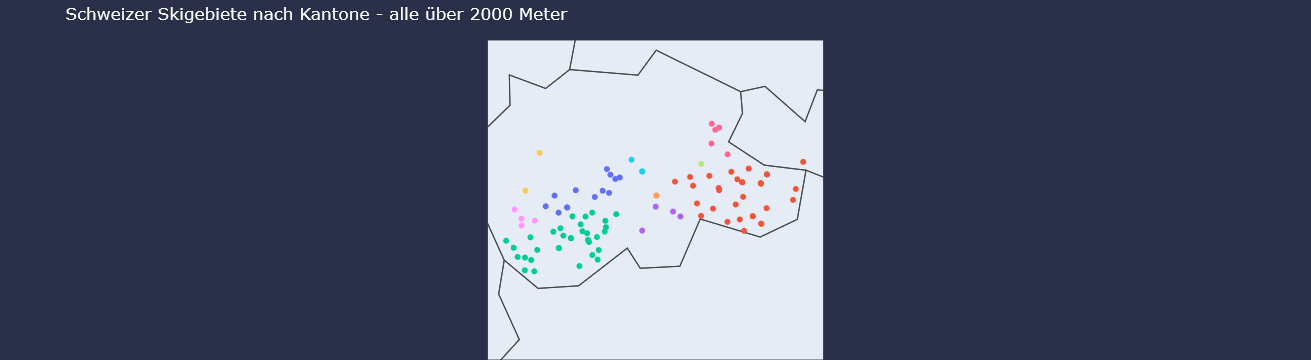

In [171]:
fig_standard_above_all = px.scatter_geo(df_above,
                    lat=df_above.Breitengrad,
                    lon=df_above.Längengrad,
                    color = df_above.Kanton,
                    hover_name="Skiresort")

fig_standard_above_all.update_layout(
    geo_scope='europe',
    margin={"r":0,"t":40,"l":0,"b":0},
    showlegend = False,
    paper_bgcolor="#2a2f4a",
    title="Schweizer Skigebiete nach Kantone - alle über 2000 Meter",
    title_font_color="white")

fig_standard_above_all.update_geos(fitbounds="locations")

fig_standard_above_all.show()

In [172]:
fig_standard_above_all.write_html('Map_Switzerland_Above_Standard.html')

## scatter_mapbox

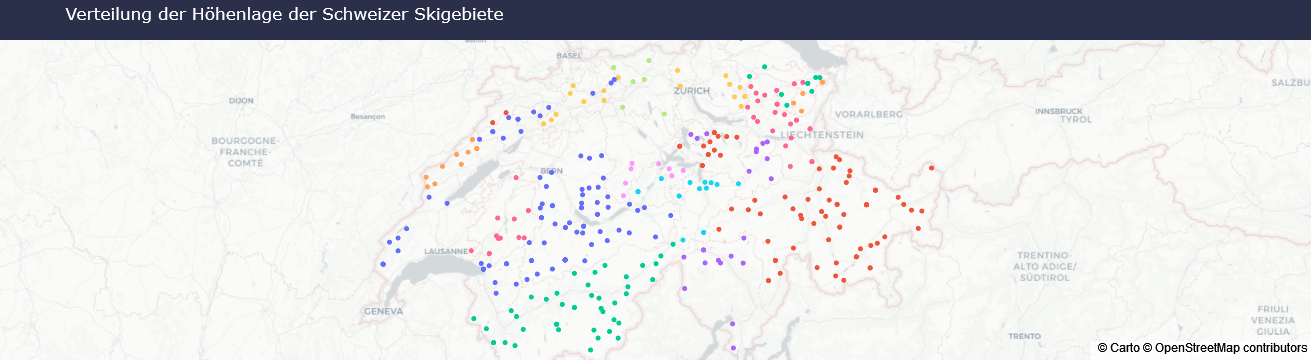

In [173]:
fig_scatter = px.scatter_mapbox(df, 
                             lon = df.Längengrad, 
                             lat = df.Breitengrad,
                             zoom = 6.5,
                             color = df.Kanton,
                             hover_name="Skiresort")
                             
fig_scatter.update_layout(showlegend = False,
                          margin={"r":0,"t":40,"l":0,"b":0},
                          mapbox_style = 'carto-positron',
                          paper_bgcolor="#2a2f4a",
                          title="Verteilung der Höhenlage der Schweizer Skigebiete",
                          title_font_color="white")

fig_scatter.show()

In [174]:
fig_scatter.write_html('Map_Switzerland_scatter_mapbox.html')

Filtered data

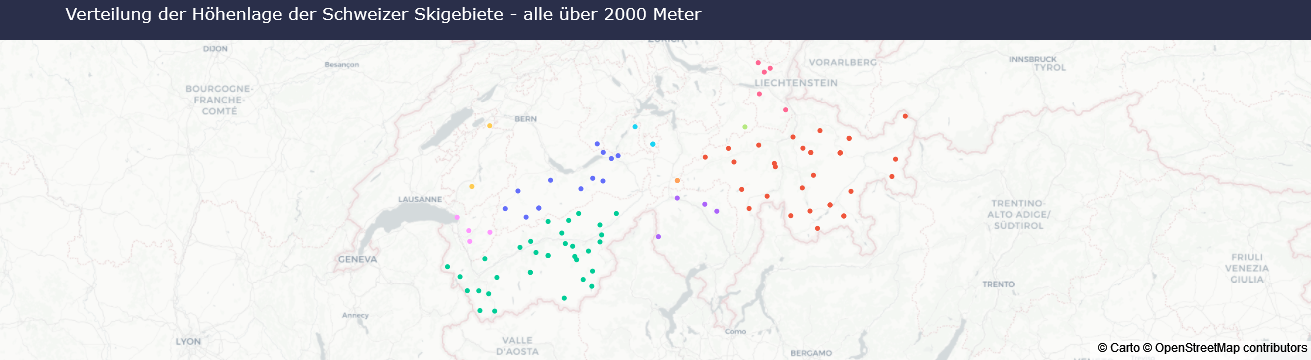

In [175]:
fig_scatter_above = px.scatter_mapbox(df_above, 
                             lon = df_above.Längengrad, 
                             lat = df_above.Breitengrad,
                             zoom = 6.5,
                             color = df_above.Kanton,
                             hover_name="Skiresort")
                             

fig_scatter_above.update_layout(showlegend = False,
                                margin={"r":0,"t":40,"l":0,"b":0},
                                mapbox_style = 'carto-positron',
                                title="Verteilung der Höhenlage der Schweizer Skigebiete - alle über 2000 Meter",
                                title_font_color="white",
                                paper_bgcolor="#2a2f4a"
                               )

fig_scatter_above.show()


In [176]:
fig_scatter_above.write_html('Map_Switzerland_scatter_mapbox_above.html')